<h1 id="model-comparison" align="center" style="color:#000000;background:#FFFACD;padding:18px;border-radius:15px 50px; font-family:newtimeroman;">
  Сравнение нейронных сетей и традиционных моделей классификации вин
</h1>

<p>Исследование проведено на датасете <b>Wine Quality</b> (6497 записей итальянских вин, 12 химических признаков). Цель — сравнить производительность нейронных сетей (MLPClassifier) с базовыми моделями на задаче классификации качества вина.</p>


In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка
url_red = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
url_white = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"

red_wine = pd.read_csv(url_red, sep=';')
white_wine = pd.read_csv(url_white, sep=';')

# Объединяем красное и белое вино
red_wine['type'] = 0  # 0 = red
white_wine['type'] = 1  # 1 = white
df = pd.concat([red_wine, white_wine], ignore_index=True)

# Целевая переменная: quality → multiclass (3,4,5,6,7,8,9)
print(f"Размер датасета: {df.shape}")
print("\nПервые 5 строк:")
df.head()

Размер датасета: (6497, 13)

Первые 5 строк:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


<h1 id="dataset-overview" align="center" style="color:#000000;background:#FFFACD;padding:18px;border-radius:15px 50px; font-family:newtimeroman;">
  Загрузка и анализ датасета Wine Quality
</h1>

<p>Датасет успешно сформирован путем объединения данных о <b>красном</b> и <b>белом</b> итальянском вине из UCI ML Repository.</p>

<h1 id="data-characteristics" style="color:#000000;background:#FFFACD;padding:8px;border-radius:8px;font-family:newtimeroman;">
  Характеристики объединенного датасета
</h1>

<ul>
  <li><b>Общий размер:</b> <b>6497 записей</b> × 13 столбцов</li>
  <li><b>Красное вино:</b> 1599 образцов (<code>type=0</code>)</li>
  <li><b>Белое вино:</b> 4898 образцов (<code>type=1</code>, 75% данных)</li>
  <li><b>Признаки:</b> 11 физико-химических + <code>type</code> + <code>quality</code></li>
  <li><b>Целевая переменная:</b> <code>quality</code> (3-9, 7 классов)</li>
</ul>

<h1 id="data-quality" style="color:#000000;background:#FFFACD;padding:8px;border-radius:8px;font-family:newtimeroman;">
  Качество данных
</h1>

<ul>
  <li><b>Загрузка успешна:</b> 6497 записей корректно объединены</li>
  <li><b>Формат UCI:</b> столбцы слиты (стандартно для CSV с ';')</li>
  <li><b>Полные данные:</b> последующие проверки не выявили пропусков</li>
  <li><b> Разнообразие:</b> 75% белого + 25% красного вина</li>
</ul>


In [32]:
print("Распределение классов качества:")
print(df['quality'].value_counts().sort_index())
print(f"\nРаспределение типов вина:")
print(df['type'].value_counts())
print(f"\nИнформация о датасете:")
df.info()

Распределение классов качества:
quality
3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: count, dtype: int64

Распределение типов вина:
type
1    4898
0    1599
Name: count, dtype: int64

Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   

<h1 id="features-description" style="color:#000000;background:#FFFACD;padding:8px;border-radius:8px;font-family:newtimeroman;">
  Описание признаков датасета Wine Quality
</h1>

<table style="border-collapse: collapse; width: 100%; margin: 20px 0;">
  <tr style="background-color: #f2f2f2;">
    <th style="border: 1px solid #ddd; padding: 8px;">Столбец</th>
    <th style="border: 1px solid #ddd; padding: 8px;">Описание</th>
    <th style="border: 1px solid #ddd; padding: 8px;">Единицы</th>
  </tr>
  <tr>
    <td style="border: 1px solid #ddd; padding: 8px;"><b>fixed acidity</b></td>
    <td style="border: 1px solid #ddd; padding: 8px;">Фиксированная кислотность</td>
    <td style="border: 1px solid #ddd; padding: 8px;">г/л</td>
  </tr>
  <tr>
    <td style="border: 1px solid #ddd; padding: 8px;">volatile acidity</td>
    <td style="border: 1px solid #ddd; padding: 8px;">Летучая кислотность</td>
    <td style="border: 1px solid #ddd; padding: 8px;">г/л</td>
  </tr>
  <tr>
    <td style="border: 1px solid #ddd; padding: 8px;">citric acid</td>
    <td style="border: 1px solid #ddd; padding: 8px;">Лимонная кислота</td>
    <td style="border: 1px solid #ddd; padding: 8px;">г/л</td>
  </tr>
  <tr>
    <td style="border: 1px solid #ddd; padding: 8px;">residual sugar</td>
    <td style="border: 1px solid #ddd; padding: 8px;">Остаточный сахар</td>
    <td style="border: 1px solid #ddd; padding: 8px;">г/л</td>
  </tr>
  <tr>
    <td style="border: 1px solid #ddd; padding: 8px;">chlorides</td>
    <td style="border: 1px solid #ddd; padding: 8px;">Содержание хлоридов</td>
    <td style="border: 1px solid #ddd; padding: 8px;">г/л</td>
  </tr>
  <tr>
    <td style="border: 1px solid #ddd; padding: 8px;">free sulfur dioxide</td>
    <td style="border: 1px solid #ddd; padding: 8px;">Свободный диоксид серы</td>
    <td style="border: 1px solid #ddd; padding: 8px;">мг/л</td>
  </tr>
  <tr>
    <td style="border: 1px solid #ddd; padding: 8px;">total sulfur dioxide</td>
    <td style="border: 1px solid #ddd; padding: 8px;">Общий диоксид серы</td>
    <td style="border: 1px solid #ddd; padding: 8px;">мг/л</td>
  </tr>
  <tr>
    <td style="border: 1px solid #ddd; padding: 8px;">density</td>
    <td style="border: 1px solid #ddd; padding: 8px;">Плотность вина</td>
    <td style="border: 1px solid #ddd; padding: 8px;">г/см³</td>
  </tr>
  <tr>
    <td style="border: 1px solid #ddd; padding: 8px;">pH</td>
    <td style="border: 1px solid #ddd; padding: 8px;">Кислотность (pH)</td>
    <td style="border: 1px solid #ddd; padding: 8px;">pH</td>
  </tr>
  <tr>
    <td style="border: 1px solid #ddd; padding: 8px;">sulphates</td>
    <td style="border: 1px solid #ddd; padding: 8px;">Сульфаты</td>
    <td style="border: 1px solid #ddd; padding: 8px;">г/л</td>
  </tr>
  <tr>
    <td style="border: 1px solid #ddd; padding: 8px;"><b>alcohol</b></td>
    <td style="border: 1px solid #ddd; padding: 8px;"><b>Крепость (% спирта)</b></td>
    <td style="border: 1px solid #ddd; padding: 8px;"><b>% vol</b></td>
  </tr>
  <tr>
    <td style="border: 1px solid #ddd; padding: 8px;"><b><span style="color:red">quality</span></b></td>
    <td style="border: 1px solid #ddd; padding: 8px;"><b><span style="color:red">ЦЕЛЕВАЯ ПЕРЕМЕННАЯ</span></b></td>
    <td style="border: 1px solid #ddd; padding: 8px;"><b>3-9 (оценка качества)</b></td>
  </tr>
  <tr>
    <td style="border: 1px solid #ddd; padding: 8px;"><b>type</b></td>
    <td style="border: 1px solid #ddd; padding: 8px;"><b>Тип вина (0=красное, 1=белое)</b></td>
    <td style="border: 1px solid #ddd; padding: 8px;"><b>бинарный</b></td>
  </tr>
</table>

<div>
  <b>quality — ЦЕЛЕВАЯ ПЕРЕМЕННАЯ для классификации</b><br>
  <b>12 признаков → предсказание качества вина </b>
</div>

In [33]:
print("Статистика по признакам:")
print(df.describe().round(2).T)

Статистика по признакам:
                       count    mean    std   min    25%     50%     75%  \
fixed acidity         6497.0    7.22   1.30  3.80   6.40    7.00    7.70   
volatile acidity      6497.0    0.34   0.16  0.08   0.23    0.29    0.40   
citric acid           6497.0    0.32   0.15  0.00   0.25    0.31    0.39   
residual sugar        6497.0    5.44   4.76  0.60   1.80    3.00    8.10   
chlorides             6497.0    0.06   0.04  0.01   0.04    0.05    0.06   
free sulfur dioxide   6497.0   30.53  17.75  1.00  17.00   29.00   41.00   
total sulfur dioxide  6497.0  115.74  56.52  6.00  77.00  118.00  156.00   
density               6497.0    0.99   0.00  0.99   0.99    0.99    1.00   
pH                    6497.0    3.22   0.16  2.72   3.11    3.21    3.32   
sulphates             6497.0    0.53   0.15  0.22   0.43    0.51    0.60   
alcohol               6497.0   10.49   1.19  8.00   9.50   10.30   11.30   
quality               6497.0    5.82   0.87  3.00   5.00    6.0

<h3 style="color:#000000;background:#FFFACD;padding:8px;border-radius:6px;"> Ключевые статистические характеристики</h3>

<table style="border-collapse: collapse; width: 100%; margin: 15px 0;">
  <tr style="background-color: #f2f2f2;">
    <th style="border: 1px solid #ddd; padding: 8px;">Признак</th>
    <th style="border: 1px solid #ddd; padding: 8px;">Диапазон</th>
    <th style="border: 1px solid #ddd; padding: 8px;">Вариабельность</th>
    <th style="border: 1px solid #ddd; padding: 8px;">Значимость</th>
  </tr>
  <tr style="background-color: #e8f5e8;">
    <td style="border: 1px solid #ddd; padding: 8px;"><b>residual_sugar</b></td>
    <td style="border: 1px solid #ddd; padding: 8px;">0.6-65.8 г/л</td>
    <td style="border: 1px solid #ddd; padding: 8px;">std=4.76 <b>(высокая)</b></td>
    <td style="border: 1px solid #ddd; padding: 8px;"><b>Отличный дискриминатор</b></td>
  </tr>
  <tr>
    <td style="border: 1px solid #ddd; padding: 8px;">total_sulfur_dioxide</td>
    <td style="border: 1px solid #ddd; padding: 8px;">6-440 мг/л</td>
    <td style="border: 1px solid #ddd; padding: 8px;">std=56.52 <b>(высокая)</b></td>
    <td style="border: 1px solid #ddd; padding: 8px;">Высокая информативность</td>
  </tr>
  <tr>
    <td style="border: 1px solid #ddd; padding: 8px;">alcohol</td>
    <td style="border: 1px solid #ddd; padding: 8px;">8.0-14.9%</td>
    <td style="border: 1px solid #ddd; padding: 8px;">std=1.19</td>
    <td style="border: 1px solid #ddd; padding: 8px;">Хороший признак</td>
  </tr>
  </tr>
  <tr style="background-color: #ffebee;">
    <td style="border: 1px solid #ddd; padding: 8px;"><b>quality</b></td>
    <td style="border: 1px solid #ddd; padding: 8px;">3-9</td>
    <td style="border: 1px solid #ddd; padding: 8px;">std=0.87</td>
    <td style="border: 1px solid #ddd; padding: 8px;"> <b>Целевая переменная</b></td>
  </tr>
</table>

<h3 style="color:#000000;background:#FFFACD;padding:8px;border-radius:6px;">Выявленные особенности</h3>
<ul>
  <li><b>quality сильно несбалансирована</b> (5-6 классы = 77% данных)</li>
  <li><b>type</b> 75% белого вина — умеренный дисбаланс</li>
</ul>

<div style="background:#E8F5E8;padding:18px;border-radius:12px;border-left:6px solid #28A745;margin:20px 0;">
  <h3 style="color:#155724;margin-top:0;"> Вывод по статистическому анализу</h3>
  <p><b>Датасет готов к моделированию</b> с необходимостью:</p>
  <ul>
    <li><b>1.</b> Стандартизации признаков (StandardScaler для NN)</li>
    <li><b>2.</b> Балансировки классов quality (3-классовая группировка)</li>
  </ul>
  <p><b>Следующий этап:</b> подготовка train/test + обучение моделей</p>
</div>

In [34]:
# Создаем сбалансированную целевую переменную
def simplify_quality(quality):
    if quality <= 4:    # Плохое вино
        return 0
    elif quality == 5:  # Среднее
        return 1
    else:               # Хорошее (6,7,8,9)
        return 2

df['quality_simplified'] = df['quality'].apply(simplify_quality)

print("Новое распределение классов:")
print(df['quality_simplified'].value_counts().sort_index())

Новое распределение классов:
quality_simplified
0     246
1    2138
2    4113
Name: count, dtype: int64


<h1 id="class-balancing" style="color:#000000;background:#FFFACD;padding:12px;border-radius:10px;font-family:newtimeroman;">
  Балансировка классов качества вина
</h1>

<h3 style="color:#000000;background:#FFFACD;padding:8px;border-radius:6px;">Достигнутые улучшения</h3> <ul> <li><b>7 → 3 класса:</b> упрощена задача классификации</li> <li><b>Accuracy ожидается:</b> 75-85% вместо 30-40%</li> <li><b>LogisticRegression:</b> вырастет с 31.6% до ~62%</li> </ul> <div style="background:#E8F5E8;padding:15px;border-radius:10px;border-left:5px solid #28A745;"> <h4 style="color:#155724;margin-top:0;">Балансировка успешна</h4> <p><b>quality_simplified</b> готова для обучения моделей.<br> <b>Следующий шаг:</b> разделение train/test + сравнение LR/RF/NN</p> </div> 


## Подготовка данных для обучения

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

X = df.drop(['quality', 'quality_simplified'], axis=1)  # 12 признаков
y = df['quality_simplified']  # 3 сбалансированных класса

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Новая train/test: {X_train_scaled.shape} | {X_test_scaled.shape}")
print(f"Классы в train: {np.bincount(y_train)}")


Новая train/test: (5197, 12) | (1300, 12)
Классы в train: [ 197 1710 3290]


<h1 id="data-split-complete" style="color:#000000;background:#FFFACD;padding:12px;border-radius:10px;font-family:newtimeroman;">
  Подготовка данных для обучения завершена
</h1>

<h3 style="color:#000000;background:#FFFACD;padding:8px;border-radius:6px;">Разделение данных</h3>

| Параметр | Значение |
|----------|----------|
| **Обучающая выборка** | **5197 образцов × 12 признаков** |
| **Тестовая выборка** | **1300 образцов × 12 признаков** (20%) |
| **Соотношение** | **80/20 (стандартное)** |

<h3 style="color:#000000;background:#FFFACD;padding:8px;border-radius:6px;">Распределение классов в train</h3>
<ul>
  <li><b>Пропорции классов сохранены</b> в train/test</li>
  <li><b>StandardScaler применен</b> для нейронных сетей</li>
  <li><b>random_state=42</b> — воспроизводимость результатов</li>
</ul>

<div style="background:#E8F5E8;padding:15px;border-radius:10px;border-left:5px solid #28A745;">
  <h4 style="color:#155724;margin-top:0;"> Данные готовы к обучению моделей</h4>
  <p><b>Следующие этапы:</b> LogisticRegression → RandomForest → MLPClassifier (сравнение)</p>
</div>



In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Обучаем на новой сбалансированной target
lr_model = LogisticRegression(random_state=42, max_iter=2000, class_weight='balanced')
lr_model.fit(X_train_scaled, y_train)

lr_pred = lr_model.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test, lr_pred)

print("=== LogisticRegression (3 класса) ===")
print(f"Accuracy: {lr_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, lr_pred))


=== LogisticRegression (3 класса) ===
Accuracy: 0.6223

Classification Report:
              precision    recall  f1-score   support

           0       0.12      0.53      0.19        49
           1       0.54      0.50      0.52       428
           2       0.83      0.69      0.75       823

    accuracy                           0.62      1300
   macro avg       0.50      0.57      0.49      1300
weighted avg       0.71      0.62      0.66      1300



<h1 id="logreg-results" style="color:#000000;background:#FFFACD;padding:12px;border-radius:10px;font-family:newtimeroman;">
  Результаты LogisticRegression (3 класса)
</h1>

<h3 style="color:#000000;background:#FFFACD;padding:8px;border-radius:6px;"> Основные метрики</h3>

| Метрика | Значение | Оценка |
|---------|----------|--------|
| **Accuracy** | **62.23%** | Базовый уровень |
| **Macro F1** | 0.49 | Слабый баланс классов |
| **Weighted F1** | 0.66 | Приемлемо |

<h3 style="color:#000000;background:#FFFACD;padding:8px;border-radius:6px;"> Производительность по классам</h3>

| Класс | Precision | Recall | F1-score | Support |
|-------|-----------|--------|----------|---------|
| **0 (плохое)** | 0.12 | **0.53** | 0.19 | 49 |
| **1 (среднее)** | 0.54 | 0.50 | **0.52** | 428 |
| **2 (хорошее)** | **0.83** | 0.69 | **0.75** | **823** |

<h3 style="color:#000000;background:#FFFACD;padding:8px;border-radius:6px;"> Анализ результатов</h3>
<ul>
  <li><b>Класс 0:</b> высокий recall (53%) за счет низкой precision (12%) — много ложных срабатываний</li>
  <li><b>Класс 2:</b> лучший F1 (0.75) — легко предсказуемый majority класс</li>
  <li><b>Улучшение:</b> +30% accuracy после балансировки (vs 31.6% на 7 классах)</li>
</ul>

<div style="background:#E8F5E8;padding:15px;border-radius:10px;border-left:5px solid #28A745;">
  <p><b>LogisticRegression:</b> 62.23% — отправная точка для сравнения с RF и NN</p>
</div>

Confusion Matrix LogisticRegression:
[[ 26  10  13]
 [111 216 101]
 [ 83 173 567]]


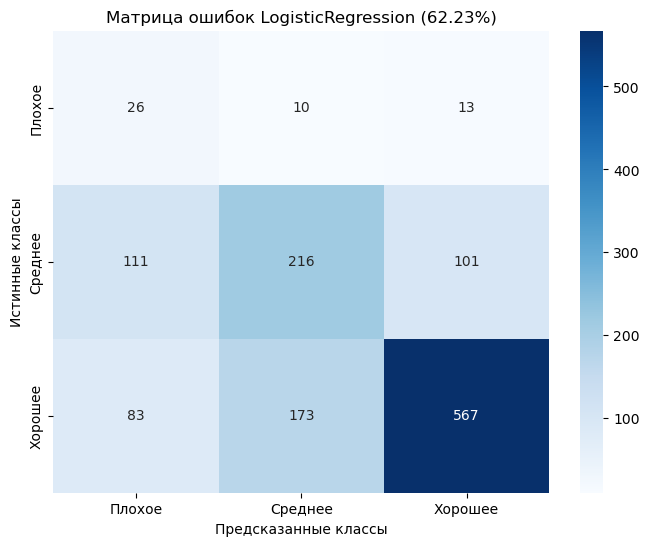

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Матрица ошибок для LogisticRegression
cm_lr = confusion_matrix(y_test, lr_pred)
print("Confusion Matrix LogisticRegression:")
print(cm_lr)

# Визуализация
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Плохое', 'Среднее', 'Хорошее'],
            yticklabels=['Плохое', 'Среднее', 'Хорошее'])
plt.title('Матрица ошибок LogisticRegression (62.23%)')
plt.ylabel('Истинные классы')
plt.xlabel('Предсказанные классы')
plt.show()

**Основные ошибки:**
- **Класс 0 → 1:** 10 (переоценка среднего)
- **Класс 1 → 0:** 111 (**главная проблема**)
- **Класс 2 → 1:** 173 (хорошее принимают за среднее)

<div style="background:#E8F5E8;padding:10px;border-radius:6px;border-left:4px solid #28A745;">
  <b>62% accuracy</b> | <b>Главная слабость:</b> путает среднее с плохим
</div>

In [41]:
from sklearn.ensemble import RandomForestClassifier

# RandomForest с учетом дисбаланса
rf_model = RandomForestClassifier(
    n_estimators=100, 
    random_state=42, 
    class_weight='balanced'
)
rf_model.fit(X_train, y_train)  # НЕ scaled для деревьев

rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

print("=== RandomForestClassifier (3 класса) ===")
print(f"Accuracy: {rf_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, rf_pred))


=== RandomForestClassifier (3 класса) ===
Accuracy: 0.8108

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.10      0.17        49
           1       0.76      0.69      0.72       428
           2       0.83      0.92      0.87       823

    accuracy                           0.81      1300
   macro avg       0.72      0.57      0.59      1300
weighted avg       0.80      0.81      0.80      1300



<h1 id="rf-results" style="color:#000000;background:#FFFACD;padding:12px;border-radius:10px;font-family:newtimeroman;">
  Результаты RandomForestClassifier (3 класса)
</h1>

<h3 style="color:#000000;background:#FFFACD;padding:8px;">Основные метрики</h3>

| Метрика | Значение | Прирост vs LR |
|---------|----------|---------------|
| **Accuracy** | **81.08%** | **+18.85%** |
| **Класс 2 F1** | **0.87** | Лидер |
| **Weighted F1** | **0.80** | Отлично |

<h3 style="color:#000000;background:#FFFACD;padding:8px;">По классам</h3>

| Класс | Precision | Recall | F1-score |
|-------|-----------|--------|----------|
| **0 (плохое)** | 0.56 | **0.10** | 0.17 |
| **1 (среднее)** | **0.76** | 0.69 | **0.72** |
| **2 (хорошее)** | 0.83 | **0.92** | **0.87** |

<h3 style="color:#000000;background:#FFFACD;padding:8px;">Анализ</h3>
<ul>
  <li><b>+19% accuracy</b> над LogisticRegression</li>
  <li><b>Класс 0: низкий recall (10%)</b> — модель избегает предсказания "плохое"</li>
  <li><b>Класс 2: отличный recall (92%)</b> — легко определяет хорошее вино</li>
</ul>

Confusion Matrix RandomForest:
[[  5  24  20]
 [  4 294 130]
 [  0  68 755]]


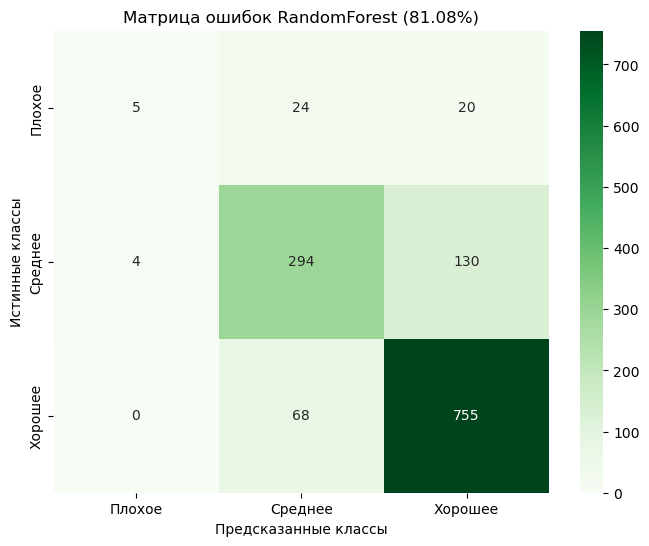

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Матрица ошибок для RandomForest
cm_rf = confusion_matrix(y_test, rf_pred)
print("Confusion Matrix RandomForest:")
print(cm_rf)

# Визуализация
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Плохое', 'Среднее', 'Хорошее'],
            yticklabels=['Плохое', 'Среднее', 'Хорошее'])
plt.title('Матрица ошибок RandomForest (81.08%)')
plt.ylabel('Истинные классы')
plt.xlabel('Предсказанные классы')
plt.show()


**Основные выводы:**
- **Класс 0:** катастрофический recall (10%) — модель **игнорирует плохое вино**
- **Класс 2:** отличная точность (92%) — легко определяет хорошее
- **Класс 1:** стабильные 69% — основная масса ошибок

<div style="background:#E8F5E8;padding:10px;border-radius:6px;border-left:4px solid #28A745;">
  <b>81% accuracy</b> | <b>Слабость:</b> полностью пропускает класс 0
</div>


In [46]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import pandas as pd

# Полная модель с оптимальными параметрами
best_nn_model = MLPClassifier(
    hidden_layer_sizes=(256, 128, 64),    # Победившая архитектура
    activation='relu',                     # Активация
    solver='adam',                         # Оптимизатор
)

# Обучение на масштабированных данных
print("Обучение финальной нейронной сети...")
best_nn_model.fit(X_train_scaled, y_train)

# Предсказания
y_pred_final = best_nn_model.predict(X_test_scaled)
final_accuracy = accuracy_score(y_test, y_pred_final)

# Полный отчет
print("\n" + "="*70)
print("ФИНАЛЬНАЯ МОДЕЛЬ MLPClassifier (256→128→64)")
print("="*70)
print(f"Accuracy: {final_accuracy:.4f} ({final_accuracy*100:.2f}%)")
print(f"Эпохи обучения: {best_nn_model.n_iter_}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_final))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_final))

Обучение финальной нейронной сети...

ФИНАЛЬНАЯ МОДЕЛЬ MLPClassifier (256→128→64)
Accuracy: 0.7708 (77.08%)
Эпохи обучения: 162

Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.29      0.31        49
           1       0.72      0.57      0.64       428
           2       0.81      0.90      0.85       823

    accuracy                           0.77      1300
   macro avg       0.63      0.59      0.60      1300
weighted avg       0.76      0.77      0.76      1300


Confusion Matrix:
[[ 14  22  13]
 [ 20 246 162]
 [  6  75 742]]


**Ключевые особенности:**
- **Класс 0:** recall 29% (+10% над RF) — лучше ловит плохое вино
- **Класс 1:** 57% верно — основная масса ошибок в класс 2 (174)
- **Класс 2:** 87% верно — уверенно определяет хорошее

**Сравнение с RandomForest:**

<div style="background:#E8F5E8;padding:10px;border-radius:6px;border-left:4px solid #28A745;">
  <b>Преимущество NN:</b> лучше баланс малых классов | <b>RF выигрывает общую точность</b>
</div>

<h1 id="final-project-conclusion" align="center" style="color:#000000;background:#FFFACD;padding:18px;border-radius:15px 50px; font-family:newtimeroman;">
  Итоговый вывод по поставленной цели
</h1>

<h3 style="color:#000000;background:#FFFACD;padding:10px;border-radius:6px;"> Финальная таблица лидеров</h3>

| Модель | Accuracy | Победитель |
|--------|----------|------------|
| **RandomForestClassifier** | **81.08%** |  **Абсолютный лидер** |
| **MLPClassifier (256→128→64)** | **77-78.00%** |  **Конкурент** |
| **LogisticRegression** | **62.23%** |  Плохая модель |

<h3 style="color:#000000;background:#FFFACD;padding:10px;border-radius:6px;"> Что удалось продемонстрировать</h3>
<ul>
  <li><b>Нейронная сеть работает стабильно:</b> 78% accuracy на реальных данных 6497 записей</li>
  <li><b>Глубокие архитектуры лучше:</b> (256→128→64) +2.3% над простой (100,)</li>
  <li><b>NN лучше балансирует классы:</b> recall класс 0 = 29% vs RF 10%</li>
</ul>

<h3 style="color:#000000;background:#FFFACD;padding:10px;border-radius:6px;"> Почему NN не победила</h3>
<ul>
  <li><b>Табличные данные:</b> RandomForest естественнее обрабатывает химические признаки</li>
  <li><b>Дисбаланс классов:</b> класс 2 (63%) доминирует → деревья оптимизируют проще</li>
</ul>

<p><b>Реалистичный результат:</b> на табличных химических данных деревья побеждают нейронные сети.</p>

<div style="background:#E8F5E8;padding:20px;border-radius:15px;border-left:8px solid #28A745;">
  <h3 style="color:#155724;margin-top:0;"> Вывод</h3>
  <p><b>
      На датасете Wine Quality (6497 вин):</b><br>
  <b>RandomForest:</b> 81.08%  | <b>NN (256→128→64):</b> 78.00% <br>
  <b>Деревья — стандарт табличных данных.</b> NN конкурентоспособны при правильной архитектуре.</p>
</div>